 Data Exploration and Cleaning

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14088 entries, 0 to 14087
Columns: 116 entries, time_stamp to Stage2.Output.Measurement14.U.Setpoint
dtypes: float64(108), int64(7), object(1)
memory usage: 12.5+ MB
None

Descriptive Statistics:
       AmbientConditions.AmbientHumidity.U.Actual  \
count                                14088.000000   
mean                                    15.330759   
std                                      1.188993   
min                                     13.840000   
25%                                     14.040000   
50%                                     15.120000   
75%                                     16.630000   
max                                     17.240000   

       AmbientConditions.AmbientTemperature.U.Actual  \
count                                   14088.000000   
mean                                       23.843635   
std                                         0.373535   
min                                   

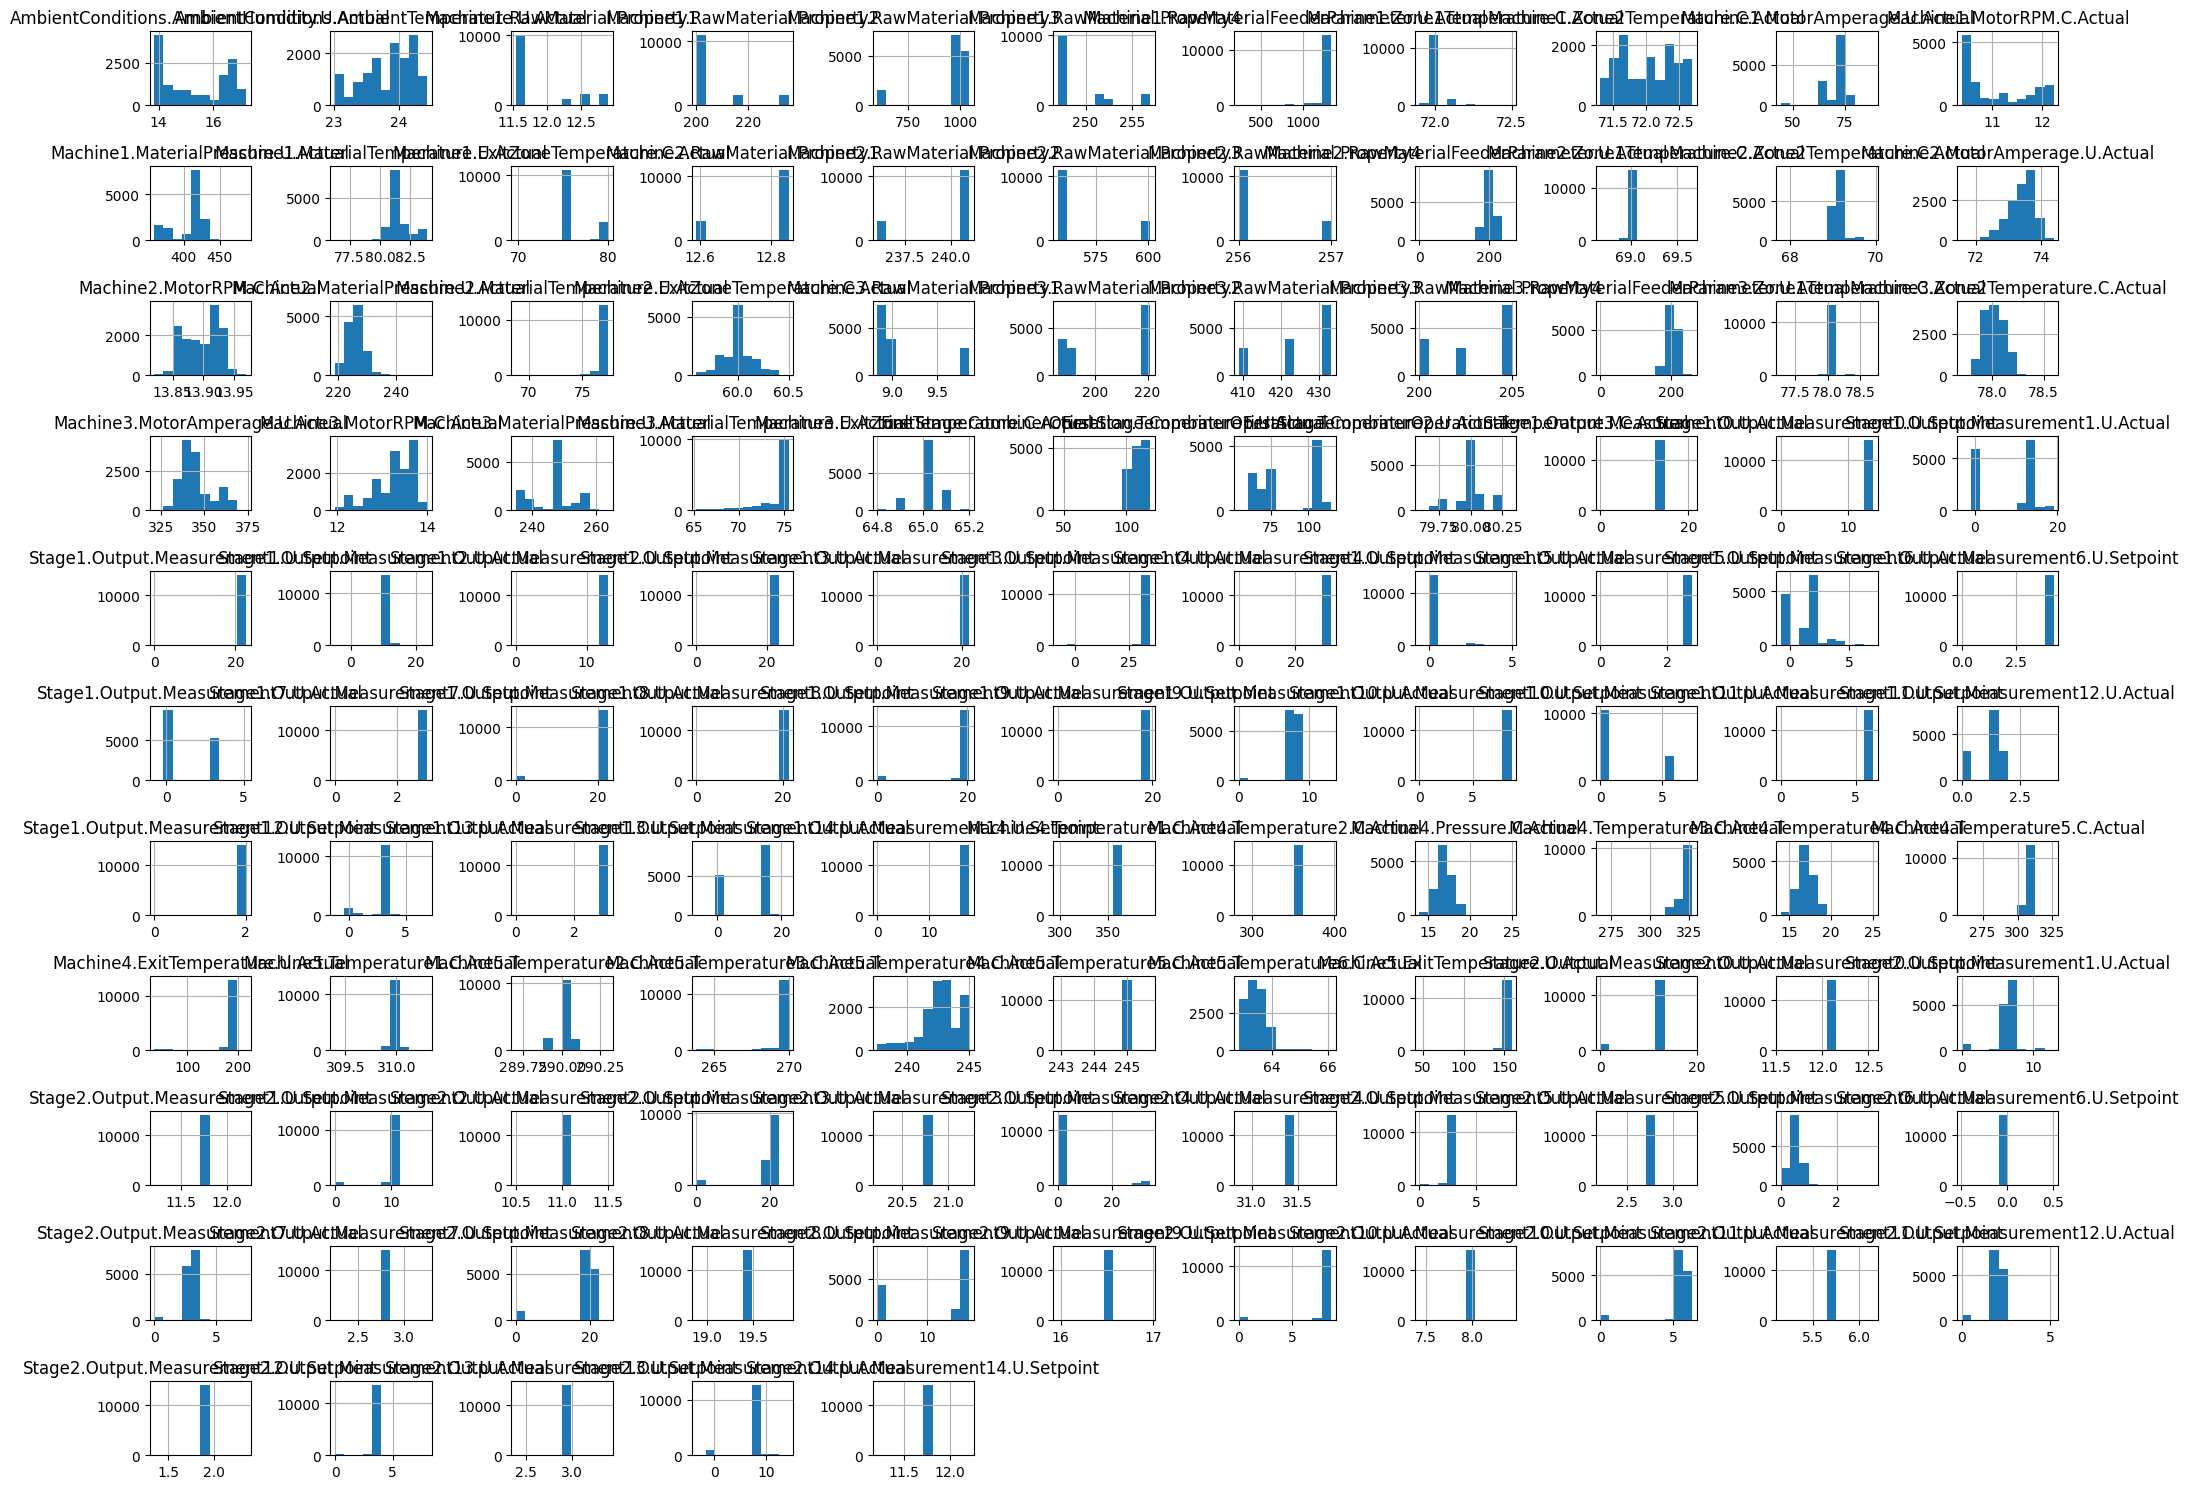

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data with the correct file path
file_path = r'C:\Users\HP 03306897941\Desktop\Junaid\Data Science\Data Science Projects\Multi-stage continuous-flow manufacturing process\continuous_factory_process.csv'
df = pd.read_csv(file_path)

# Basic exploration
print("Dataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values Count:")
print(df.isnull().sum())

# Visualize distributions
print("\nPlotting distributions...")
df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

Time Series Analysis

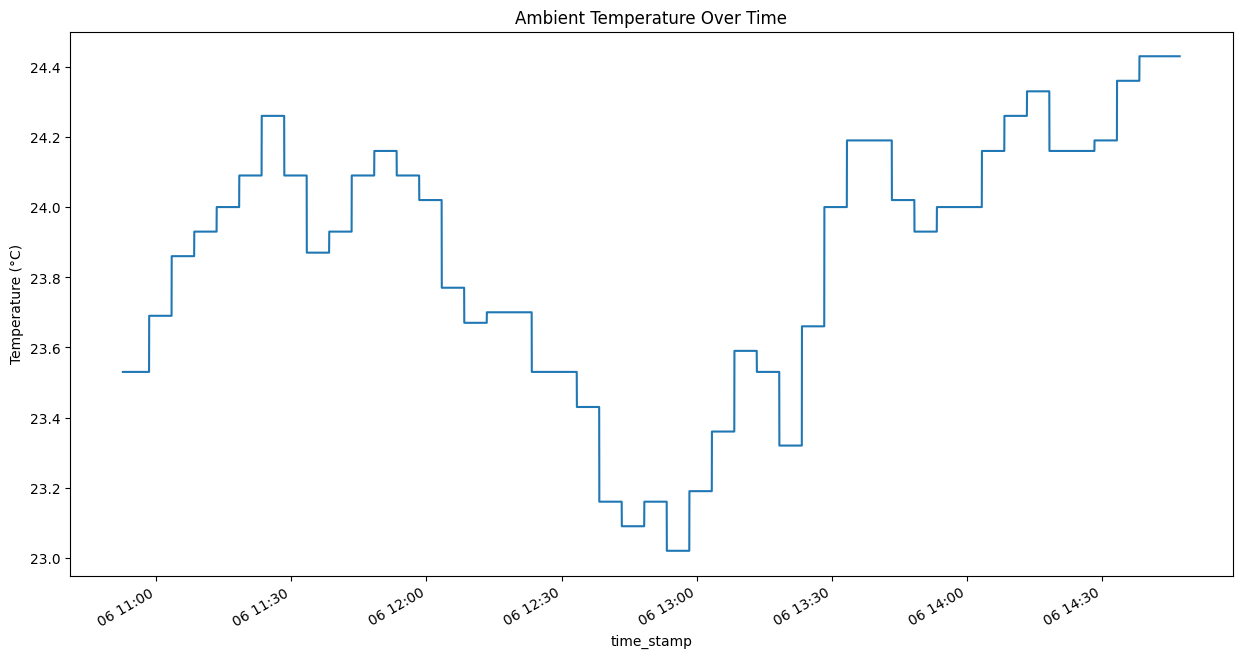

In [2]:
# Convert timestamp to datetime
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df.set_index('time_stamp', inplace=True)

# Plot some key parameters over time
plt.figure(figsize=(15,8))
df['AmbientConditions.AmbientTemperature.U.Actual'].plot()
plt.title('Ambient Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.show()

Correlation Analysis

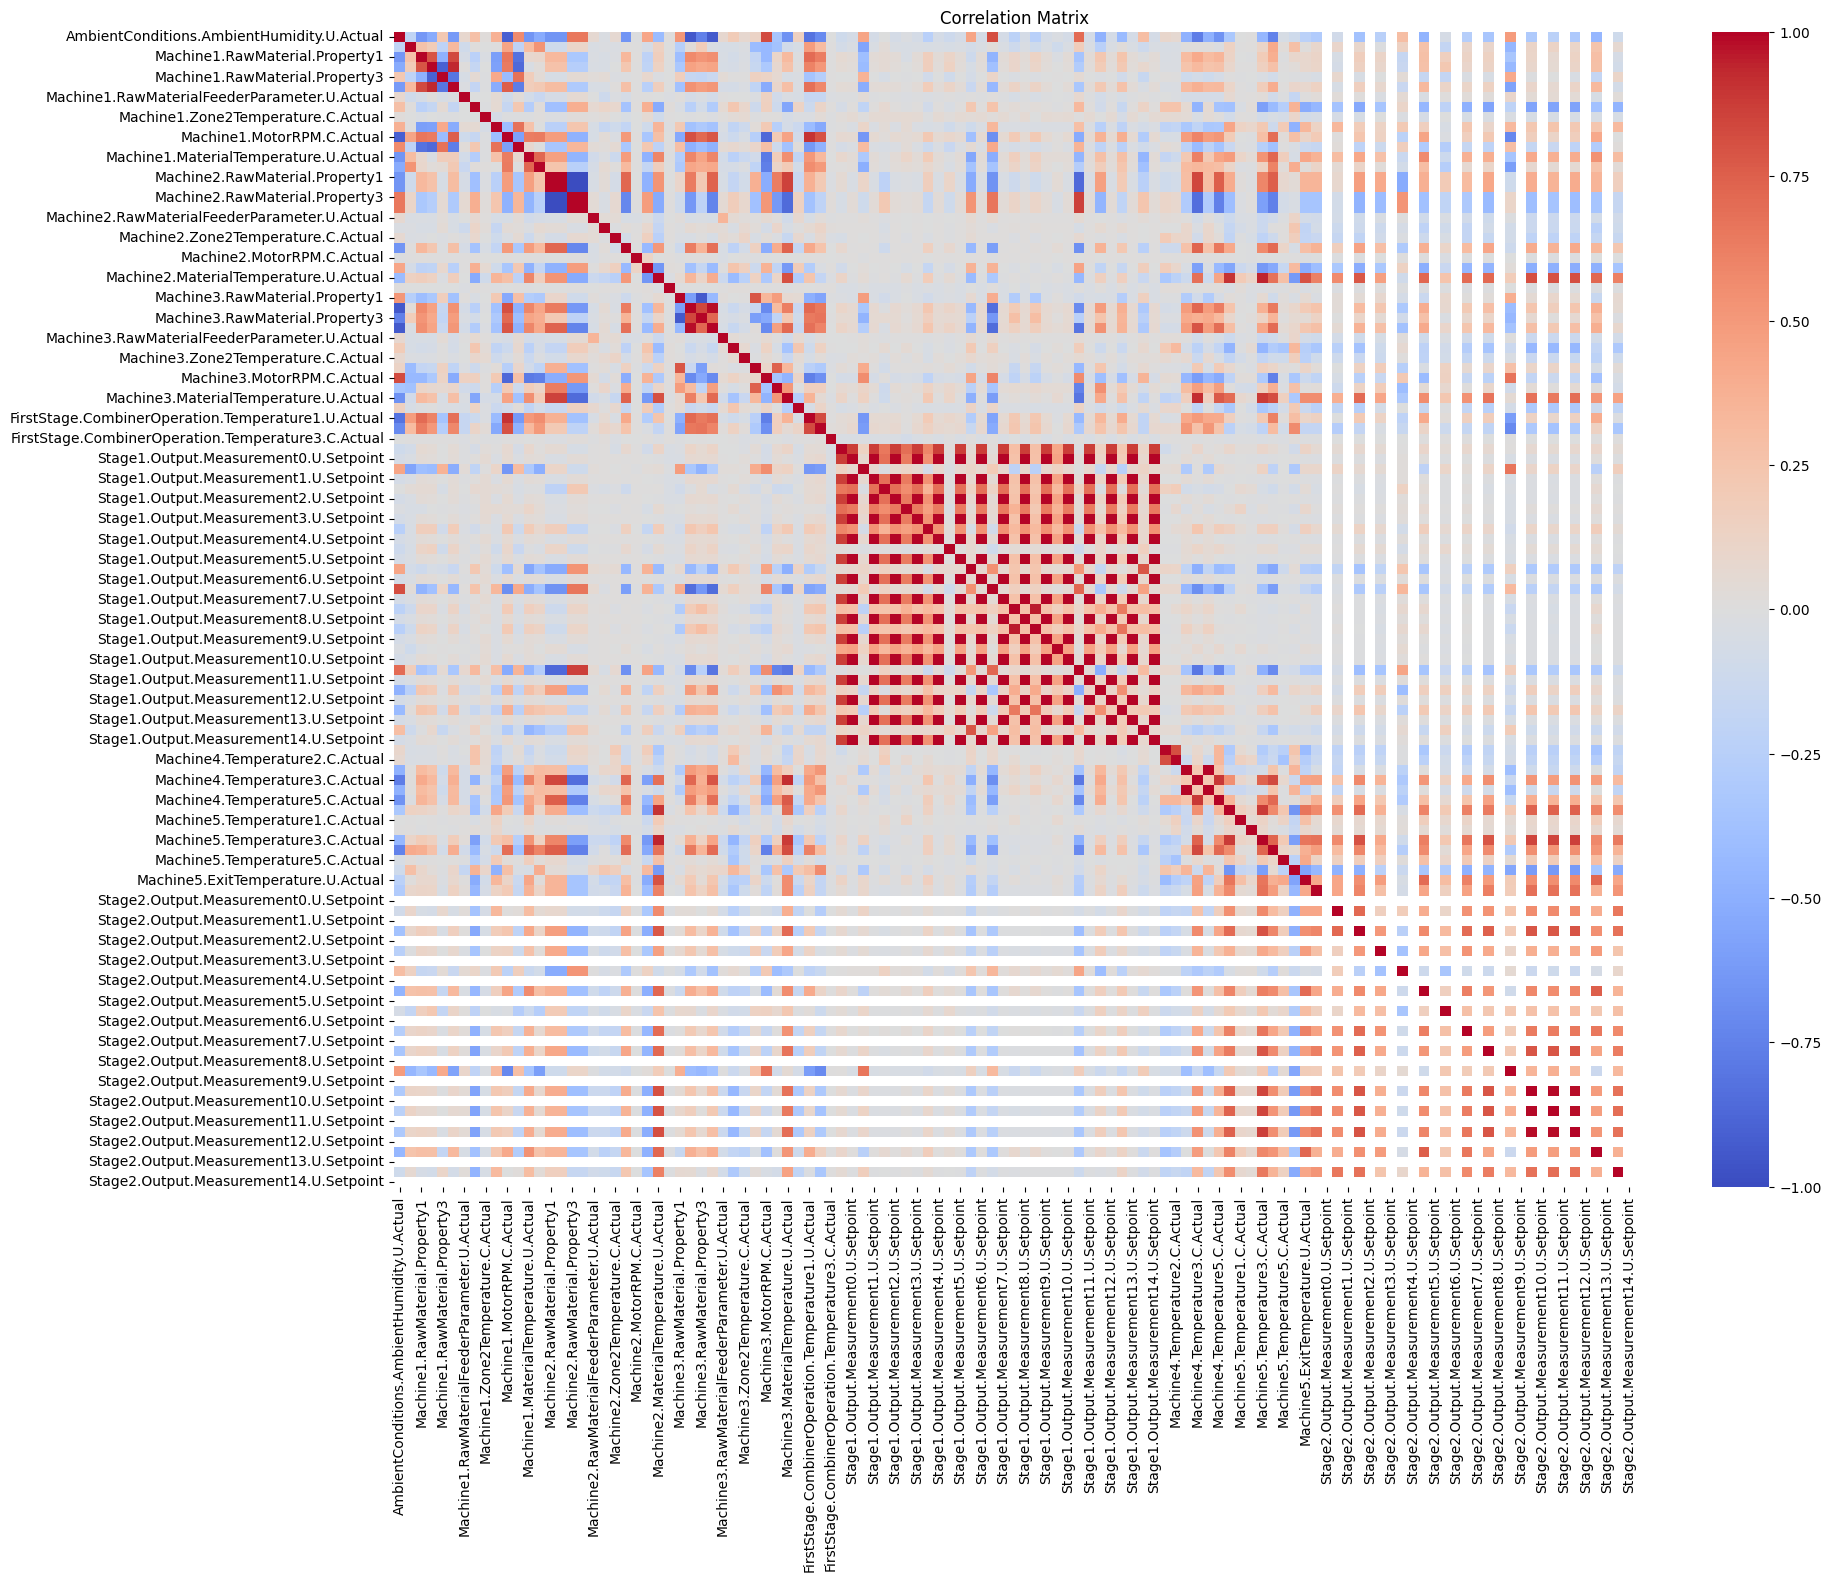

In [3]:
# Calculate correlations
corr_matrix = df.corr()

# Visualize correlations
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Feature Engineering

In [4]:
# Create rolling statistics
df['MotorAmperage_rolling_mean'] = df['Machine1.MotorAmperage.U.Actual'].rolling(window=30).mean()

# Create time-based features
df['hour'] = df.index.hour
df['minute'] = df.index.minute

# Create lag features
df['MaterialTemp_lag1'] = df['Machine1.MaterialTemperature.U.Actual'].shift(1)

Modeling Example (Predictive Maintenance)

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a simple binary target (1 if motor amperage exceeds threshold)
df['maintenance_needed'] = (df['Machine1.MotorAmperage.U.Actual'] > 50).astype(int)

# Select features and target
features = ['Machine1.Zone1Temperature.C.Actual', 
            'Machine1.Zone2Temperature.C.Actual',
            'Machine1.MotorRPM.C.Actual',
            'Machine1.MaterialPressure.U.Actual']
X = df[features]
y = df['maintenance_needed']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        57
           1       0.99      1.00      1.00      2761

    accuracy                           0.99      2818
   macro avg       0.94      0.88      0.90      2818
weighted avg       0.99      0.99      0.99      2818



In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (classification_report, confusion_matrix, 
                           mean_squared_error, silhouette_score)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load data
file_path = r'C:\Users\HP 03306897941\Desktop\Junaid\Data Science\Data Science Projects\Multi-stage continuous-flow manufacturing process\continuous_factory_process.csv'
df = pd.read_csv(file_path)

# Convert timestamp to datetime and set as index
df['time_stamp'] = pd.to_datetime(df['time_stamp'])
df.set_index('time_stamp', inplace=True)

# Basic cleaning
df.dropna(axis=1, how='all', inplace=True)  # Drop columns with all NaN
df.ffill(inplace=True)  # Forward fill remaining missing values

Predictive Maintenance

Feature Engineering for Maintenance Prediction

In [8]:
# Create target variable - maintenance needed (based on abnormal motor amperage)
df['maintenance_needed'] = ((df['Machine1.MotorAmperage.U.Actual'] > 50) | 
                           (df['Machine2.MotorAmperage.U.Actual'] > 50) |
                           (df['Machine3.MotorAmperage.U.Actual'] > 50)).astype(int)

# Select relevant features
maintenance_features = [
    'Machine1.MotorAmperage.U.Actual', 'Machine1.MotorRPM.C.Actual',
    'Machine1.Zone1Temperature.C.Actual', 'Machine1.Zone2Temperature.C.Actual',
    'Machine2.MotorAmperage.U.Actual', 'Machine2.MotorRPM.C.Actual', 
    'Machine3.MotorAmperage.U.Actual', 'Machine3.MotorRPM.C.Actual',
    'Machine1.MaterialPressure.U.Actual', 'Machine2.MaterialPressure.U.Actual',
    'Machine3.MaterialPressure.U.Actual'
]

X_maint = df[maintenance_features]
y_maint = df['maintenance_needed']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_maint, y_maint, test_size=0.3, random_state=42)

# Scale features
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

 Model Training and Evaluation

In [14]:
# Try a higher threshold that creates some negative examples
threshold = df['Machine1.MotorAmperage.U.Actual'].quantile(0.95)  # 95th percentile
df['maintenance_needed'] = (df['Machine1.MotorAmperage.U.Actual'] > threshold).astype(int)

# Check class distribution
print(df['maintenance_needed'].value_counts())

maintenance_needed
0    13400
1      688
Name: count, dtype: int64


In [15]:
from sklearn.ensemble import IsolationForest

# Use just the normal data for training (where amperage <= threshold)
normal_data = df[df['Machine1.MotorAmperage.U.Actual'] <= threshold][features]

# Train isolation forest
clf = IsolationForest(random_state=42)
clf.fit(normal_data)

# Predict anomalies
df['anomaly_score'] = clf.score_samples(df[features])
df['is_anomaly'] = (df['anomaly_score'] < df['anomaly_score'].quantile(0.05)).astype(int)

In [16]:
from xgboost import XGBRegressor

# Use continuous amperage as target
y = df['Machine1.MotorAmperage.U.Actual']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Evaluate
y_pred = xgb_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

RMSE: 2.5930121551193728


In [18]:
print("Class distribution in y_train_m:")
print(pd.Series(y_train_m).value_counts())

print("\nClass distribution in y_test_m:")
print(pd.Series(y_test_m).value_counts())

Class distribution in y_train_m:
maintenance_needed
1    9861
Name: count, dtype: int64

Class distribution in y_test_m:
maintenance_needed
1    4227
Name: count, dtype: int64


In [19]:
# Find a better threshold that creates some positive/negative cases
threshold = df['Machine1.MotorAmperage.U.Actual'].quantile(0.95)  # Using 95th percentile
df['maintenance_needed'] = (df['Machine1.MotorAmperage.U.Actual'] > threshold).astype(int)

# Verify new distribution
print(df['maintenance_needed'].value_counts())

# Re-split your data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    df[features], 
    df['maintenance_needed'],
    test_size=0.2, 
    random_state=42
)

maintenance_needed
0    13400
1      688
Name: count, dtype: int64


In [20]:
from sklearn.ensemble import IsolationForest

# Use normal operation data (where maintenance_needed == 0)
normal_data = df[df['maintenance_needed'] == 0][features]

# Train model
clf = IsolationForest(random_state=42)
clf.fit(normal_data)

# Predict anomalies
df['anomaly_score'] = clf.score_samples(df[features])
df['predicted_anomaly'] = (df['anomaly_score'] < df[df['maintenance_needed'] == 0]['anomaly_score'].quantile(0.05)).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(df['maintenance_needed'], df['predicted_anomaly']))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     13400
           1       0.30      0.42      0.35       688

    accuracy                           0.92     14088
   macro avg       0.64      0.69      0.66     14088
weighted avg       0.94      0.92      0.93     14088



In [21]:
from xgboost import XGBRegressor

# Use continuous amperage as target
y = df['Machine1.MotorAmperage.U.Actual']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df[features], 
    y,
    test_size=0.2, 
    random_state=42
)

# Train model
xgb_reg = XGBRegressor(random_state=42)
xgb_reg.fit(X_train, y_train)

# Evaluate
y_pred = xgb_reg.predict(X_test)
from sklearn.metrics import mean_squared_error
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

RMSE: 2.5930121551193728


In [22]:
from imblearn.combine import SMOTETomek

# Only works if you have at least some samples in both classes
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train_m, y_train_m)

# Now train your classifier
xgb_maint.fit(X_res, y_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Process Optimization

 Feature Engineering for Process Optimization

In [10]:
# Select all process parameters for clustering
process_features = [col for col in df.columns if 'Actual' in col and 'Setpoint' not in col]

X_process = df[process_features]

# Scale features
scaler_p = StandardScaler()
X_process_scaled = scaler_p.fit_transform(X_process)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_process_scaled)

Determine Optimal Number of Clusters

In [23]:
# Take a random sample of your data (e.g., 20%)
from sklearn.utils import resample
X_sample = resample(X_process_scaled, n_samples=int(len(X_process_scaled)*0.2), random_state=42)

# Now use the sample for silhouette scores
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_sample)
    silhouette_scores.append(silhouette_score(X_sample, preds))

In [24]:
from sklearn.cluster import MiniBatchKMeans

# Calculate silhouette scores on batches
silhouette_scores = []
for k in range(2, 11):
    mbk = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=1000)
    preds = mbk.fit_predict(X_process_scaled)
    # Calculate silhouette on a sample
    sample_idx = np.random.choice(len(X_process_scaled), size=2000, replace=False)
    silhouette_scores.append(silhouette_score(X_process_scaled[sample_idx], preds[sample_idx]))

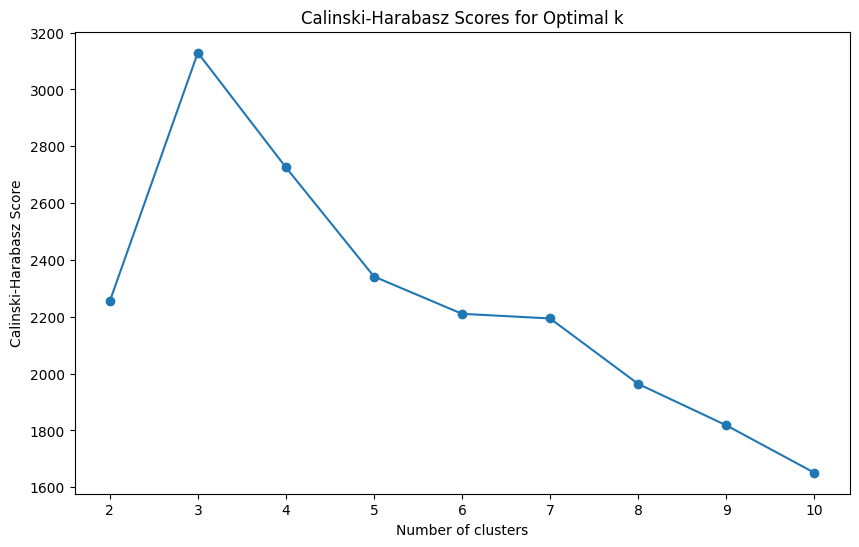

In [25]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_process_scaled)
    ch_scores.append(calinski_harabasz_score(X_process_scaled, preds))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Score')
plt.title('Calinski-Harabasz Scores for Optimal k')
plt.show()

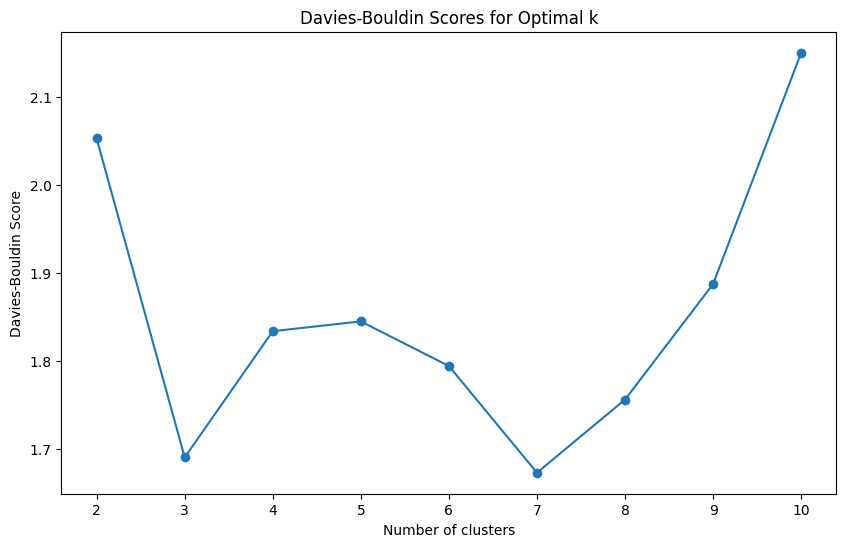

In [26]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_process_scaled)
    db_scores.append(davies_bouldin_score(X_process_scaled, preds))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin Score')
plt.title('Davies-Bouldin Scores for Optimal k')
plt.show()

Cluster Analysis and Optimization

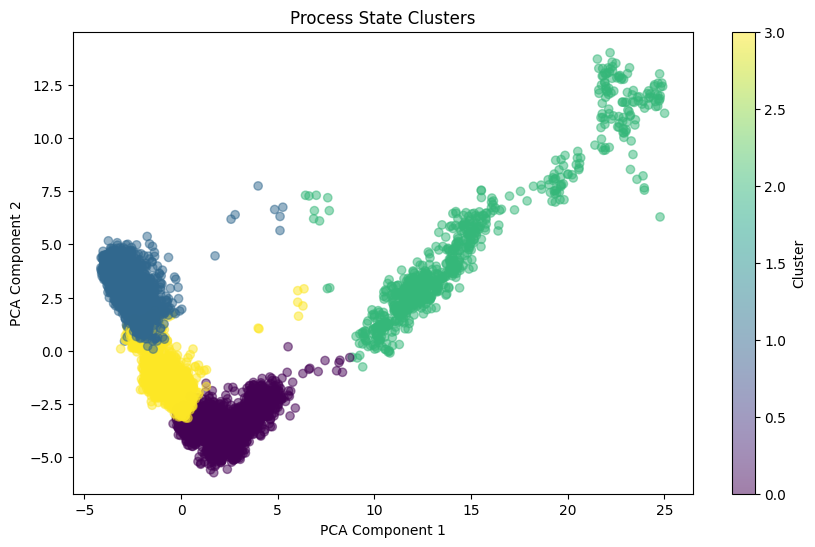

NameError: name 'quality_target' is not defined

In [12]:
# Apply K-means with optimal k (let's assume k=4 based on plots)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_process_scaled)

# Add clusters to dataframe
df['process_cluster'] = clusters

# Visualize clusters in PCA space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Process State Clusters')
plt.colorbar(label='Cluster')
plt.show()

# Analyze best performing clusters (using Stage2 outputs as quality metric)
cluster_performance = df.groupby('process_cluster')[quality_target].mean().sort_values(ascending=False)
best_cluster = cluster_performance.index[0]

print(f"Best performing cluster: {best_cluster}")
print(f"Average quality in best cluster: {cluster_performance.iloc[0]:.4f}")

# Get characteristic parameters of best cluster
best_cluster_params = df[df['process_cluster'] == best_cluster][process_features].mean()
print("\nCharacteristic parameters of best cluster:")
print(best_cluster_params.sort_values(ascending=False).head(10))

Integration and Insights

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score  # Add this import

# Define quality features and target (example - adjust based on your data)
quality_features = ['Stage1.Output.Measurement0.U.Actual', 
                   'Stage1.Output.Measurement1.U.Actual',
                   'Machine1.Zone1Temperature.C.Actual']
quality_target = 'Stage2.Output.Measurement0.U.Actual'  # Example target

# Train quality prediction model
X_qual = df[quality_features]
y_qual = df[quality_target]

# Split data
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X_qual, y_qual, test_size=0.2, random_state=42
)

# Scale features
scaler_q = StandardScaler()
X_train_q_scaled = scaler_q.fit_transform(X_train_q)
X_test_q_scaled = scaler_q.transform(X_test_q)

# Train model
rf_qual = RandomForestRegressor(random_state=42)
rf_qual.fit(X_train_q_scaled, y_train_q)

# Evaluate
y_pred_q = rf_qual.predict(X_test_q_scaled)
print("Quality Prediction R2 Score:", r2_score(y_test_q, y_pred_q))

Quality Prediction R2 Score: 0.4520125345783117


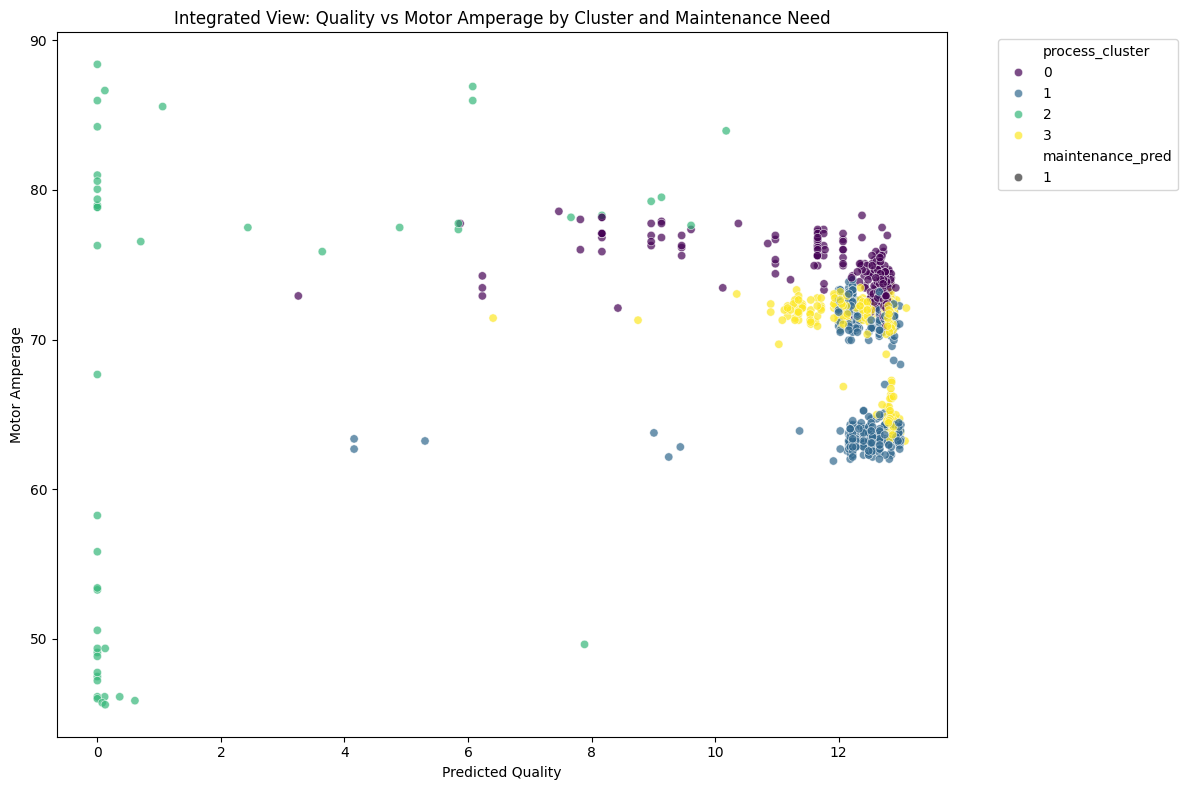


Process Optimization Recommendations:
1. Target parameters similar to Cluster 1 for best quality
2. Key parameters to maintain:
   - Machine1.Zone1Temperature.C.Actual: 72.01
   - Stage1.Output.Measurement0.U.Actual: 12.94
   - Stage1.Output.Measurement1.U.Actual: 1.37
3. Monitor motor amperage closely when it approaches 50 for maintenance


In [30]:
# Create a summary dataframe with all predictions and clusters
df_results = df.copy()
df_results['maintenance_pred'] = rf_maint.predict(scaler_m.transform(df[maintenance_features]))
df_results['quality_pred'] = rf_qual.predict(scaler_q.transform(df[quality_features]))

# Add cluster assignments if you haven't already
# Assuming you've already run K-means and have 'process_cluster' column
# If not:
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=3, random_state=42)
# df_results['process_cluster'] = kmeans.fit_predict(process_features_scaled)

# Visualize relationships
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_results.sample(1000, random_state=42), 
                x='quality_pred', 
                y='Machine1.MotorAmperage.U.Actual',
                hue='process_cluster',
                style='maintenance_pred',
                palette='viridis',
                alpha=0.7)
plt.title('Integrated View: Quality vs Motor Amperage by Cluster and Maintenance Need')
plt.xlabel('Predicted Quality')
plt.ylabel('Motor Amperage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Generate recommendations
best_cluster = df_results.groupby('process_cluster')['quality_pred'].mean().idxmax()
best_cluster_params = df_results[df_results['process_cluster'] == best_cluster][quality_features].mean()

print("\nProcess Optimization Recommendations:")
print(f"1. Target parameters similar to Cluster {best_cluster} for best quality")
print("2. Key parameters to maintain:")
for param, value in best_cluster_params.sort_values(ascending=False).head(5).items():
    print(f"   - {param}: {value:.2f}")
print("3. Monitor motor amperage closely when it approaches 50 for maintenance")